<a href="https://colab.research.google.com/github/AstorBoy11/Machine-Learning/blob/main/TG_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")

print("Path to dataset files:", path)

100%|██████████| 75.9k/75.9k [00:00<00:00, 46.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1


pyclustering tidak ditemukan. Install: pip install pyclustering
Menggunakan file: /root/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1/shopping_trends.csv
Shape: (3900, 19)
Kolom: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

Dropped: ['Customer ID']
Numerik: ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Kategori: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']
Shape fitur: (3900, 88)


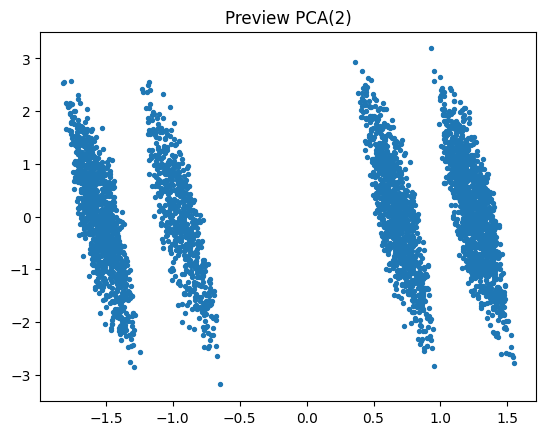

KMeans k=2 DBI=2.9474
KMeans k=3 DBI=3.4429
KMeans k=4 DBI=3.7980
KMeans k=5 DBI=3.5707
KMeans k=6 DBI=3.4250
KMeans k=7 DBI=3.2701
KMeans k=8 DBI=3.2889
KMeans k=9 DBI=3.0564
KMeans k=10 DBI=2.9992
Best KMeans k: 2 DBI: 2.9473786231944006


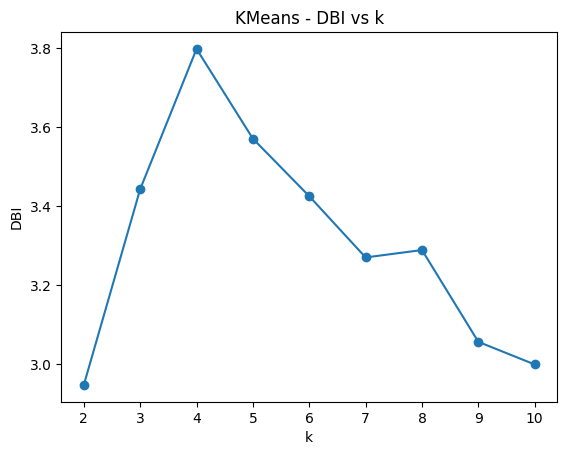

Lewati X-Means (pyclustering belum diinstall)
DBSCAN eps=0.3, minpts=3 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.3, minpts=5 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.3, minpts=10 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.4, minpts=3 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.4, minpts=5 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.4, minpts=10 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.5, minpts=3 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.5, minpts=5 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.5, minpts=10 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.6, minpts=3 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.6, minpts=5 -> clusters=0, noise=3900, DBI=nan
DBSCAN eps=0.6, minpts=10 -> clusters=0, noise=3900, DBI=nan


eps  minpts  clusters  noise  dbi
0   0.3       3         0   3900  NaN
1   0.3       5         0   3900  NaN
2   0.3      10         0   3900  NaN
3   0.4       3         0   3900  NaN
4   0.4       5         0   3900  NaN
5   0.4      10         0   3900  NaN
6   0.5       3         0   3900  NaN
7   0.5       5         0   3900  NaN
8   0.5      10         0   3900  NaN
9   0.6       3         0   3900  NaN
10  0.6       5         0   3900  NaN
11  0.6      10         0   3900  NaN

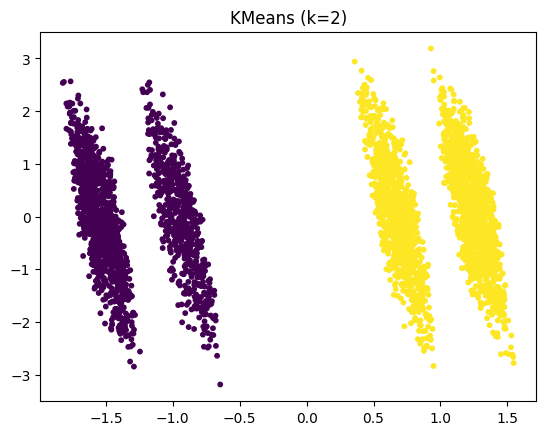

In [4]:
# ------------------------------------------------------------
# Analisis clustering dataset "Customer Shopping Latest Trends"
# sesuai metode di jurnal (DBSCAN, K-Means, X-Means)
# ------------------------------------------------------------
# pip install pandas numpy scikit-learn matplotlib pyclustering
# ------------------------------------------------------------

import os, glob, warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import inspect

# X-Means dari pyclustering
try:
    from pyclustering.cluster.xmeans import xmeans, kmeans_plusplus_initializer
    PYCLUSTERING_AVAILABLE = True
except:
    PYCLUSTERING_AVAILABLE = False
    print("pyclustering tidak ditemukan. Install: pip install pyclustering")

# -------------------------
# 1. Load dataset
# -------------------------
dataset_dir = "/root/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1"
csv_files = glob.glob(os.path.join(dataset_dir, "*.csv"))
if not csv_files:
    raise FileNotFoundError("Tidak ada file CSV ditemukan.")
csv_path = csv_files[0]
print("Menggunakan file:", csv_path)

df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Kolom:", list(df.columns))
display(df.head())

# -------------------------
# 2. Drop kolom ID / kolom ber-kardinalitas tinggi
# -------------------------
df.columns = [c.strip() for c in df.columns]
id_cols = [c for c in df.columns if "id" in c.lower()]
df = df.drop(columns=id_cols, errors="ignore")

high_card = [c for c in df.select_dtypes(include=['object']).columns if df[c].nunique() > 60]
df = df.drop(columns=high_card, errors="ignore")
print("Dropped:", id_cols + high_card)

# -------------------------
# 3. Handle missing
# -------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna("Unknown")

# Reduce kategori terlalu banyak
def reduce_top(series, top_n=12):
    top = series.value_counts().nlargest(top_n).index
    return series.where(series.isin(top), "Other")

for c in cat_cols:
    if df[c].nunique() > 12:
        df[c] = reduce_top(df[c])

# Refresh list kolom
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerik:", num_cols)
print("Kategori:", cat_cols)

# -------------------------
# 4. Preprocessing: Scaling + OneHot
# -------------------------
# Pastikan kompatibilitas sklearn
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    onehot = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', onehot, cat_cols)
])

X = preprocessor.fit_transform(df)
print("Shape fitur:", X.shape)

# -------------------------
# 5. PCA untuk visualisasi
# -------------------------
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X)
plt.scatter(X_pca2[:,0], X_pca2[:,1], s=8)
plt.title("Preview PCA(2)")
plt.show()

# -------------------------
# 6. K-Means (k=2..10)
# -------------------------
k_values = range(2,11)
dbi_k = []
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X)
    dbi = metrics.davies_bouldin_score(X, labels)
    dbi_k.append(dbi)
    print(f"KMeans k={k} DBI={dbi:.4f}")

best_k = k_values[np.argmin(dbi_k)]
print("Best KMeans k:", best_k, "DBI:", min(dbi_k))

plt.plot(list(k_values), dbi_k, marker='o')
plt.title("KMeans - DBI vs k")
plt.xlabel("k"); plt.ylabel("DBI")
plt.show()

# -------------------------
# 7. X-Means (opsional)
# -------------------------
if PYCLUSTERING_AVAILABLE:
    data_list = X.tolist()
    init_centers = kmeans_plusplus_initializer(data_list, 2).initialize()
    xm = xmeans(data_list, init_centers, kmax=11)
    xm.process()
    clusters = xm.get_clusters()
    labels_x = np.full(len(X), -1)
    for i, cl in enumerate(clusters):
        labels_x[cl] = i
    if len(set(labels_x)) > 1:
        dbi_x = metrics.davies_bouldin_score(X, labels_x)
    else:
        dbi_x = np.nan
    print("X-Means cluster:", len(clusters), "DBI:", dbi_x)
else:
    print("Lewati X-Means (pyclustering belum diinstall)")

# -------------------------
# 8. DBSCAN sweep
# -------------------------
eps_list = [0.3, 0.4, 0.5, 0.6]
minpts_list = [3,5,10]

dbscan_results = []
for eps in eps_list:
    for mp in minpts_list:
        db = DBSCAN(eps=eps, min_samples=mp).fit(X)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        dbi = np.nan
        if n_clusters >= 2:
            dbi = metrics.davies_bouldin_score(X, labels)
        dbscan_results.append((eps, mp, n_clusters, n_noise, dbi))
        print(f"DBSCAN eps={eps}, minpts={mp} -> clusters={n_clusters}, noise={n_noise}, DBI={dbi}")

dbscan_df = pd.DataFrame(dbscan_results, columns=["eps","minpts","clusters","noise","dbi"])
display(dbscan_df)

# -------------------------
# 9. Visualisasi contoh hasil terbaik
# -------------------------
# KMeans terbaik
km = KMeans(n_clusters=best_k, random_state=42, n_init='auto').fit(X)
labels_km = km.labels_
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_km, s=10)
plt.title(f"KMeans (k={best_k})")
plt.show()

# DBSCAN terbaik
dbscan_valid = dbscan_df.dropna()
if not dbscan_valid.empty:
    best_row = dbscan_valid.loc[dbscan_valid['dbi'].idxmin()]
    eps, mp = best_row['eps'], best_row['minpts']
    labels_db = DBSCAN(eps=eps, min_samples=mp).fit_predict(X)
    plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_db, s=10)
    plt.title(f"DBSCAN eps={eps}, minpts={mp}")
    plt.show()


# Kode 2

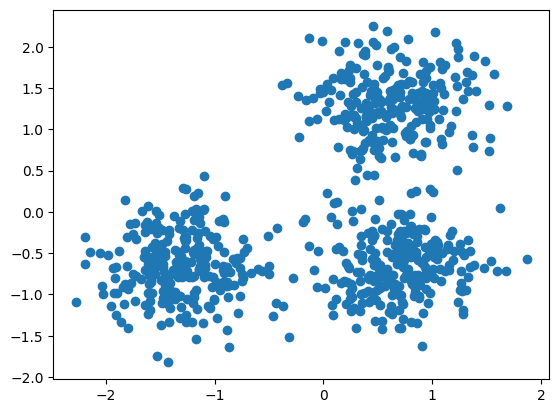

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


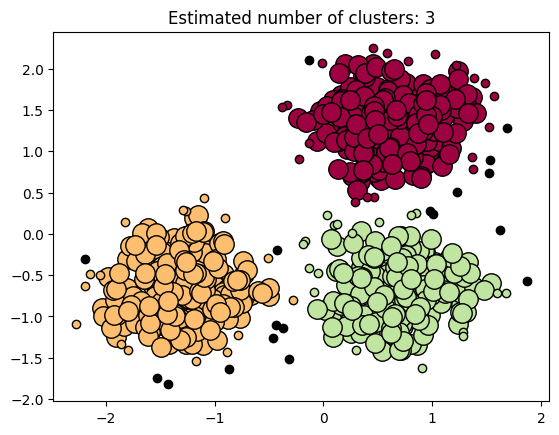

In [6]:
# Path ke dataset
dataset_dir = "/root/.cache/kagglehub/datasets/bhadramohit/customer-shopping-latest-trends-dataset/versions/1"

# Pembuatan Dataset Sintetis
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# Visualisasikan data yang dihasilkan dengan cara ini:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Compute DBSCAN
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Evaluasi Kualitas Klasterisasi
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

# Visualisasi Hasil Klasterisasi
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()